## Screenshot processing

In [264]:
# Basic imports
import numpy as np
import cv2
import statistics
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

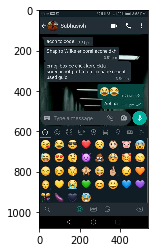

In [11]:
img = cv2.imread('../resource/screenshots/Arka.jpeg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [74]:
file_path = '../resource/screenshots/aritra.jpeg'

In [75]:
# discard half
def halved(file_path):

    img = cv2.imread(file_path)
    n_row = (img.shape[0]//2)
    img = img[n_row:, :]
    
    return img

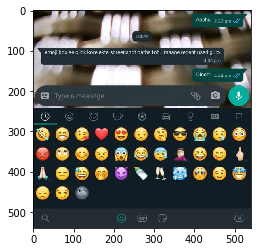

In [76]:
halved = halved(file_path)

plt.imshow(cv2.cvtColor(halved, cv2.COLOR_BGR2RGB))
plt.show()

### identifying the border using the green line

For detecting the green line which under-lines the **recent** option, we use the `[:, :, 0]`, for best resluts. The pixel value lies in the range [145,155].

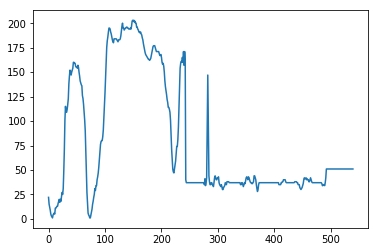

In [140]:
l_1 = halved[:,:,0][:,0]
plt.plot(range(len(l_1)), l_1)

In [127]:
np.max(l_1), np.argmax(l_1)

(147, 32)

In [135]:
recur_max(l_1)

(147, 39)

In [146]:
np.max(np.where(l_1 == recur_max(l_1)))

282

In [2]:
# The objective is to find the last peak in the range [lower, upper]
  
def recur_max(l, lower, upper):
    
    def in_range(m):
        output = True
        if not (m<=upper and m>=lower):
            output = False
        return output
    
    max_1, loc_1 = np.max(l), np.argmax(l)
    if in_range(max_1):
        
         if in_range(np.max(l[loc_1+1:])):
                return recur_max(l[loc_1+1:], lower, upper)
         else:
                return max_1
    else:
        
        return recur_max(l[loc_1+1:], lower, upper)
        

In [3]:
def crop_upper(file_path):
    
    # discard half
    def halved(file_path):

        img = cv2.imread(file_path)
        n_row = (img.shape[0]//2)
        img = img[n_row:, :]

        return img
    
    half_img = halved(file_path)
    pixel_array = half_img[:,:,0][:,0]
    
    loc = np.max(np.where(pixel_array == recur_max(pixel_array, lower = 145, upper = 155)))
    
    cropped_img = half_img[loc:,:]
    
    return cropped_img

### Crop upper code 

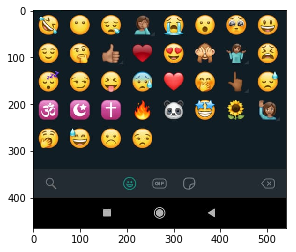

In [158]:
file_path = '../resource/screenshots/Trisha.jpeg'

img = crop_upper(file_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Crop below code

In [167]:
file_path = '../resource/screenshots/Trisha.jpeg'

img = crop_upper(file_path)

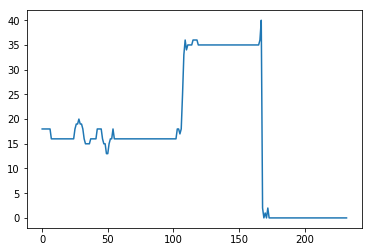

In [168]:
l_1 = img[:,:,2][img.shape[0]//2:,1]
plt.plot(range(len(l_1)), l_1)

In [169]:
np.max(l_1), np.where(l_1 == 35)

(40, (array([111, 112, 113, 114, 119, 120, 121, 122, 123, 124, 125, 126, 127,
         128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]),))

In [4]:
def crop(file_path):
    
    up_cropped = crop_upper(file_path)
    
    pixel_array_0 = up_cropped[:,:,0][up_cropped.shape[0]//2:,1]  #51
    pixel_array_1 = up_cropped[:,:,1][up_cropped.shape[0]//2:,1]  #44
    pixel_array_2 = up_cropped[:,:,2][up_cropped.shape[0]//2:,1]  #35
    
    loc_0 = np.min(np.where(pixel_array_0==51))
    loc_1 = np.min(np.where(pixel_array_1==44))
    loc_2 = np.min(np.where(pixel_array_2==35))
    
    #print("0", np.min(np.where(pixel_array_0==51)))
    #print("1", np.min(np.where(pixel_array_1==44)))
    #print("2", np.min(np.where(pixel_array_2==35)))
    
    loc = max(loc_0, loc_1, loc_2)
    
    cropped_img = up_cropped[:loc+up_cropped.shape[0]//2, :]
    
    return cropped_img

### Final Cropping

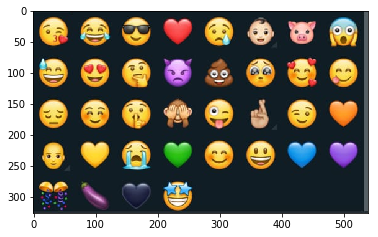

In [194]:
file_path = '../resource/screenshots/Arka.jpeg'

img = crop(file_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### final crop

In [24]:
file_path = '../resource/screenshots/Trisha_5.jpeg'

img = crop(file_path)

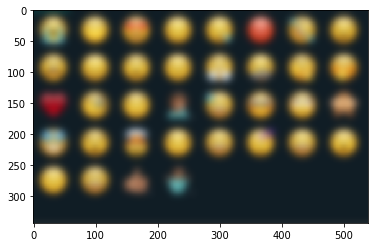

In [25]:
kernel = np.ones((5,5),np.float32)/25

k = 20

for i in range(k):
    img = cv2.filter2D(img,-1,kernel)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
img.shape[1]

540

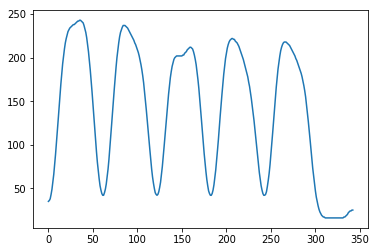

In [29]:
l_1 = img[:,:,2][:,100]
plt.plot(range(len(l_1)), l_1)

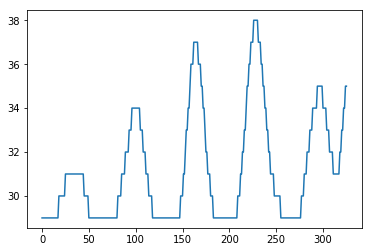

In [263]:
l_1 = img[:,:,1][:,200]
plt.plot(range(len(l_1)), l_1)

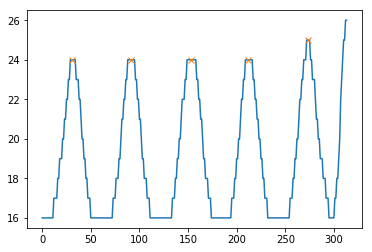

In [269]:

x = l_1
peaks, val = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [285]:
peaks

array([ 31,  91, 153, 212, 273])

In [259]:
val

{'peak_heights': array([19., 19., 23., 20., 24.])}

### Peak detection

In [366]:
def final_crop(file_path):

    main_img = crop(file_path)

    kernel = np.ones((5,5),np.float32)/25

    k = 20
    
    img = main_img
    for i in range(k):
        img = cv2.filter2D(img,-1,kernel)
    
    # Row check
    peak_len = []
    l = np.random.uniform(low=0, high=main_img.shape[0], size=1000).astype(int)
    for i in l:
        pixel_array = img[:,:,2][i]
        peaks, val = find_peaks(pixel_array, height=0)
        peak_len.append(len(peaks))
    
    #print("simulated num of emojis in a row : ", peak_len)
    num_emojis_row = statistics.mode(peak_len)
    #print("mode of emojis in a row : ",num_emojis_row)
    #print("Prob. of mode(row)",len(np.where(np.array(peak_len)==num_emojis_row)[0])/len(peak_len))
    
    assert num_emojis_row == 8, 'Incompatible screenshot dimension(rows) : '+ str(num_emojis_row)
    
    # Column check
    peak_len = []
    l = np.random.uniform(low=0, high=main_img.shape[0]//2, size=1000).astype(int)
    for i in l:
        pixel_array = img[:,:,2][:, i]
        peaks, val = find_peaks(pixel_array, height=0)
        peak_len.append(len(peaks))
    
    #print("simulated num of emojis in a col : ", peak_len)
    num_emojis_col = statistics.mode(peak_len)
    #print("mode of emojis in a col : ",num_emojis_row)
    #print("Prob. of mode(col)",len(np.where(np.array(peak_len)==num_emojis_row)[0])/len(peak_len))
    
    assert num_emojis_col >= 4, 'Incompatible screenshot dimension(col) : '+ str(num_emojis_col)
    
    num_emojis = 0
    while num_emojis!=num_emojis_col:
        l = np.random.uniform(low=0, high=main_img.shape[0]//2, size=1).astype(int)
        pixel_array = img[:,:,2][:, l[0]]
        peaks, val = find_peaks(pixel_array, height=0)
        num_emojis = len(peaks)
    
    if num_emojis > 4:
        loc = (peaks[-2]+peaks[-1])//2
        output = main_img[:loc, :]
    else:
        output = main_img
    
    dim = (560,280)
    output = cv2.resize(output, dim, interpolation = cv2.INTER_AREA)
    
    return output


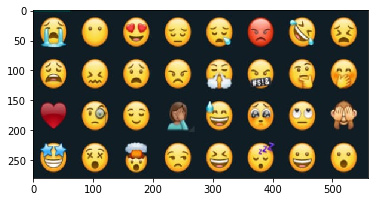

In [374]:
file_path = '../resource/screenshots/Trisha_5.jpeg'

im = final_crop(file_path)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

### ROUGH

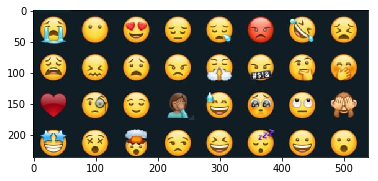

In [89]:
file_path = '../resource/screenshots/Trisha_5.jpeg'

#im = final_crop(file_path)
im = final_crop(file_path)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()